## Importing all the necessary libraries

In [1]:
#importing all the images
import pandas as pd
import os
import glob
import os.path
import numpy as np

## Initializations and specifications

In [2]:
# list the source folder path within which we have all the defect class folders
src = "C:\\Users\\dristi\\Downloads\\eda3"

In [3]:
# listing all the defect folders in the src folder
folders = [os.path.join(src,name) for name in os.listdir(src) if os.path.isdir(os.path.join(src,name))]

In [4]:
#checking the defect folder names and paths in the source directory
folders

['C:\\Users\\dristi\\Downloads\\eda3\\test_all']

In [5]:
# Mapping of label and label name
label_map = pd.DataFrame([
('Mistracking',0),
('Trim',1),
('Contamination',2),
('Tear',3),
('Wrinkle/Fold',4)],columns=['Label_name','Label'])

In [6]:
label_map

,Label_name,Label
0,Mistracking,0
1,Trim,1
2,Contamination,2
3,Tear,3
4,Wrinkle/Fold,4


## Generating the reports

We are going to generate the following reports:
- Report 1 : What are the defects present in each image
- Report 2 : Count of each type of defect in each image
- Report 3 : What are the defects present in each image after augmentation

### Generating the reports before augmentation

In [7]:
# creating the mapping of image and label
mappings = []
for defect in folders:
    print("Defect folder",defect)
    # list all the .jpg files in the defect folder
    images1 = glob.glob(defect + "/*.JPG")
    images2 = glob.glob(defect + "/*.jpg")
    images = list(set(images1+images2))
    # For each image, mapping the labels from the .txt file
    for image in images:
        print("image",image)
        try:
            text_file = pd.read_csv(image.split('.')[0]+'.txt',sep=" ", header=None)
            labels = list(text_file[0])
            print("labels",labels)
            mapping = [(image,l) for l in labels]
            mappings.extend(mapping)
        except FileNotFoundError:
            mappings.append((image,None))

Defect folder C:\Users\dristi\Downloads\eda3\test_all
image C:\Users\dristi\Downloads\eda3\test_all\VISUCI1_S1_20200328_182033_816_3.jpg
labels [2]
image C:\Users\dristi\Downloads\eda3\test_all\VISUCI1_S1_20191228_042809_797_3.jpg
labels [3]
image C:\Users\dristi\Downloads\eda3\test_all\VISUCI1_S1_20191227_221546_811_3.jpg
labels [3]
image C:\Users\dristi\Downloads\eda3\test_all\VISUCI1_S1_20191220_124936_990_1.jpg
labels [4]
image C:\Users\dristi\Downloads\eda3\test_all\VISUCI1_S1_20200130_084718_708_3.jpg
labels [2]
image C:\Users\dristi\Downloads\eda3\test_all\VISUCI1_S1_20191219_003928_420_1.jpg
labels [0, 1, 1, 4, 3]
image C:\Users\dristi\Downloads\eda3\test_all\VISUCI1_S1_20191228_034119_396_1.jpg
labels [3, 4]
image C:\Users\dristi\Downloads\eda3\test_all\VISUCI1_S1_20191229_035147_225_1.jpg
labels [1, 3, 4, 3, 0]
image C:\Users\dristi\Downloads\eda3\test_all\VISUCI1_S1_20191228_060136_467_1.jpg
labels [4]
image C:\Users\dristi\Downloads\eda3\test_all\VISUCI1_S1_20191229_023954_

In [8]:
# Creating a dataframe of the mapping
mapping_df = pd.DataFrame(mappings,columns=['Image_path','Label'])

In [9]:
mapping_df['count'] = 1

In [10]:
list(mapping_df.values)

[array(['C:\\Users\\dristi\\Downloads\\eda3\\test_all\\VISUCI1_S1_20200328_182033_816_3.jpg',
        2, 1], dtype=object),
 array(['C:\\Users\\dristi\\Downloads\\eda3\\test_all\\VISUCI1_S1_20191228_042809_797_3.jpg',
        3, 1], dtype=object),
 array(['C:\\Users\\dristi\\Downloads\\eda3\\test_all\\VISUCI1_S1_20191227_221546_811_3.jpg',
        3, 1], dtype=object),
 array(['C:\\Users\\dristi\\Downloads\\eda3\\test_all\\VISUCI1_S1_20191220_124936_990_1.jpg',
        4, 1], dtype=object),
 array(['C:\\Users\\dristi\\Downloads\\eda3\\test_all\\VISUCI1_S1_20200130_084718_708_3.jpg',
        2, 1], dtype=object),
 array(['C:\\Users\\dristi\\Downloads\\eda3\\test_all\\VISUCI1_S1_20191219_003928_420_1.jpg',
        0, 1], dtype=object),
 array(['C:\\Users\\dristi\\Downloads\\eda3\\test_all\\VISUCI1_S1_20191219_003928_420_1.jpg',
        1, 1], dtype=object),
 array(['C:\\Users\\dristi\\Downloads\\eda3\\test_all\\VISUCI1_S1_20191219_003928_420_1.jpg',
        1, 1], dtype=object),
 array([

In [11]:
# QC - checking which files have wrong annotation
list(mapping_df[mapping_df['Label']>4]['Image_path'])

[]

In [12]:
# getting the the label names
mapping_df = pd.merge(mapping_df,label_map,how='left')

In [13]:
mapping_df['Label_name'] = mapping_df['Label_name'].fillna('Unknown')

In [14]:
mapping_df

,Image_path,Label,count,Label_name
0,C:\Users\dristi\Downloads\eda3\test_all\VISUCI...,2,1,Contamination
1,C:\Users\dristi\Downloads\eda3\test_all\VISUCI...,3,1,Tear
2,C:\Users\dristi\Downloads\eda3\test_all\VISUCI...,3,1,Tear
3,C:\Users\dristi\Downloads\eda3\test_all\VISUCI...,4,1,Wrinkle/Fold
4,C:\Users\dristi\Downloads\eda3\test_all\VISUCI...,2,1,Contamination
...,...,...,...,...
97,C:\Users\dristi\Downloads\eda3\test_all\VISUCI...,0,1,Mistracking
98,C:\Users\dristi\Downloads\eda3\test_all\VISUCI...,0,1,Mistracking
99,C:\Users\dristi\Downloads\eda3\test_all\VISUCI...,2,1,Contamination
100,C:\Users\dristi\Downloads\eda3\test_all\VISUCI...,2,1,Contamination


In [15]:
# QC number of images
len(set(mapping_df['Image_path']))

50

In [16]:
# generating the report1 from the mappings dataframe
report1 = pd.pivot_table(mapping_df, values='count', index=['Image_path'],
                    columns=['Label_name'], aggfunc=np.mean)

In [17]:
report1 = report1.fillna(0)[[c for c in report1.columns if c !='No/Unknown defect']]

In [18]:
report1

Label_name,Contamination,Mistracking,Tear,Trim,Wrinkle/Fold
Image_path,,,,,
C:\Users\dristi\Downloads\eda3\test_all\VISUCI1_S1_20191218_143415_554_1.jpg,0.0,1.0,1.0,1.0,0.0
C:\Users\dristi\Downloads\eda3\test_all\VISUCI1_S1_20191219_003928_420_1.jpg,0.0,1.0,1.0,1.0,1.0
C:\Users\dristi\Downloads\eda3\test_all\VISUCI1_S1_20191220_042651_317_1.jpg,0.0,1.0,1.0,1.0,0.0
C:\Users\dristi\Downloads\eda3\test_all\VISUCI1_S1_20191220_124936_990_1.jpg,0.0,0.0,0.0,0.0,1.0
C:\Users\dristi\Downloads\eda3\test_all\VISUCI1_S1_20191220_130027_734_3.jpg,0.0,0.0,1.0,0.0,0.0
C:\Users\dristi\Downloads\eda3\test_all\VISUCI1_S1_20191221_010621_953_1.jpg,0.0,1.0,0.0,0.0,0.0
C:\Users\dristi\Downloads\eda3\test_all\VISUCI1_S1_20191223_205617_570_1.jpg,0.0,1.0,0.0,1.0,1.0
C:\Users\dristi\Downloads\eda3\test_all\VISUCI1_S1_20191227_155935_012_1.jpg,0.0,1.0,0.0,1.0,0.0
C:\Users\dristi\Downloads\eda3\test_all\VISUCI1_S1_20191227_221546_811_3.jpg,0.0,0.0,1.0,0.0,0.0


In [19]:
# Writing the report1 to a .csv file
report1.to_csv("r1.csv")

In [19]:
# generating the report2 from the mappings dataframe
report2 = pd.pivot_table(mapping_df, values='count', index=['Image_path'],
                    columns=['Label_name'], aggfunc=np.sum)

In [21]:
report2 = report2.fillna(0)[[c for c in report2.columns if c !='No/Unknown defect']]

In [22]:
report2

Label_name,Contamination,Mistracking,Tear,Trim,Wrinkle/Fold
Image_path,,,,,
C:\Users\dristi\Downloads\eda3\test_all\VISUCI1_S1_20191218_143415_554_1.jpg,0.0,1.0,1.0,1.0,0.0
C:\Users\dristi\Downloads\eda3\test_all\VISUCI1_S1_20191219_003928_420_1.jpg,0.0,1.0,1.0,2.0,1.0
C:\Users\dristi\Downloads\eda3\test_all\VISUCI1_S1_20191220_042651_317_1.jpg,0.0,1.0,1.0,2.0,0.0
C:\Users\dristi\Downloads\eda3\test_all\VISUCI1_S1_20191220_124936_990_1.jpg,0.0,0.0,0.0,0.0,1.0
C:\Users\dristi\Downloads\eda3\test_all\VISUCI1_S1_20191220_130027_734_3.jpg,0.0,0.0,1.0,0.0,0.0
C:\Users\dristi\Downloads\eda3\test_all\VISUCI1_S1_20191221_010621_953_1.jpg,0.0,2.0,0.0,0.0,0.0
C:\Users\dristi\Downloads\eda3\test_all\VISUCI1_S1_20191223_205617_570_1.jpg,0.0,1.0,0.0,1.0,2.0
C:\Users\dristi\Downloads\eda3\test_all\VISUCI1_S1_20191227_155935_012_1.jpg,0.0,2.0,0.0,1.0,0.0
C:\Users\dristi\Downloads\eda3\test_all\VISUCI1_S1_20191227_221546_811_3.jpg,0.0,0.0,1.0,0.0,0.0


In [23]:
# Writing the report2 to a .csv file
report2.to_csv("report2_v3_test.csv")

### Generating the reports after augmentation

In [48]:
# # creating the mapping of image and augmented image
# mappings = []
# all_img_file_names = set(mapping_df['Image_path'])
# for defect in folders:
#     print("Defect folder",defect)
#     # list all the .jpg files in the defect folder
#     images1 = glob.glob(defect + "\\output\\*.JPG")
#     images2 = glob.glob(defect + "\\output\\*.jpg")
#     images = list(set(images1+images2))
#     # For each image, mapping the labels from the .txt file
#     for image in all_img_file_names:
#         print("image",image)
#         img_name = image.split('\\')[-1]
#         defect_fold_name = image.split('\\')[-2]
#         print('image name',img_name)
#         augmented_list = [f for f in images if img_name in f and defect_fold_name in f]
#         mapping = [(image,f) for f in augmented_list]
#         mappings.extend(mapping)

In [30]:
# # Creating a dataframe of the mapping
# mapping_df2 = pd.DataFrame(mappings,columns=['Image_path','augmented_img_path'])

In [31]:
# len(mapping_df2)

304

In [32]:
# len(mapping_df2.drop_duplicates())

304

In [33]:
# len(mapping_df2['augmented_img_path'].drop_duplicates())

304

In [34]:
# mapping_df2

,Image_path,augmented_img_path
0,C:\Users\dristi\Downloads\P&G\Annotated Data\0...,C:\Users\dristi\Downloads\P&G\Annotated Data\0...
1,C:\Users\dristi\Downloads\P&G\Annotated Data\0...,C:\Users\dristi\Downloads\P&G\Annotated Data\0...
2,C:\Users\dristi\Downloads\P&G\Annotated Data\0...,C:\Users\dristi\Downloads\P&G\Annotated Data\0...
3,C:\Users\dristi\Downloads\P&G\Annotated Data\0...,C:\Users\dristi\Downloads\P&G\Annotated Data\0...
4,C:\Users\dristi\Downloads\P&G\Annotated Data\0...,C:\Users\dristi\Downloads\P&G\Annotated Data\0...
...,...,...
299,C:\Users\dristi\Downloads\P&G\Annotated Data\G...,C:\Users\dristi\Downloads\P&G\Annotated Data\G...
300,C:\Users\dristi\Downloads\P&G\Annotated Data\G...,C:\Users\dristi\Downloads\P&G\Annotated Data\G...
301,C:\Users\dristi\Downloads\P&G\Annotated Data\G...,C:\Users\dristi\Downloads\P&G\Annotated Data\G...
302,C:\Users\dristi\Downloads\P&G\Annotated Data\G...,C:\Users\dristi\Downloads\P&G\Annotated Data\G...


In [35]:
# # getting the the label names
# mapping_df2 = pd.merge(mapping_df2,mapping_df)

In [39]:
# #Qc - count after join
# len(mapping_df2)

711

In [40]:
# # Qc - uniqueness check after join (possible because we can have same defect present more than once in an image)
# len(mapping_df2.drop_duplicates())

556

In [42]:
# mapping_df3 = mapping_df2[[c for c in mapping_df2.columns if c!='Image_path']]\
#                 .rename(columns = {'augmented_img_path':'Image_path'})

In [43]:
# mapping_df4 = mapping_df.append(mapping_df3)

In [44]:
# len(mapping_df4)

1983

In [45]:
# # generating the report1 from the mappings dataframe
# report1_aug = pd.pivot_table(mapping_df4, values='count', index=['Image_path'],
#                     columns=['Label_name'], aggfunc=np.mean)

In [46]:
# report1_aug

Label_name,Contamination,Fold,Mistracking,No defect,Tear,Trim,Wrinkle
Image_path,,,,,,,
C:\Users\dristi\Downloads\P&G\Annotated Data\01 TS Mistracking\VISUCI1_S1_20191208_095508_811_1 - Copy.jpg,1.0,1.0,1.0,NaN,1.0,1.0,1.0
C:\Users\dristi\Downloads\P&G\Annotated Data\01 TS Mistracking\VISUCI1_S1_20191208_095508_811_1.jpg,NaN,NaN,1.0,NaN,1.0,NaN,NaN
C:\Users\dristi\Downloads\P&G\Annotated Data\01 TS Mistracking\VISUCI1_S1_20200107_023300_274_1.jpg,NaN,NaN,1.0,NaN,NaN,NaN,NaN
C:\Users\dristi\Downloads\P&G\Annotated Data\01 TS Mistracking\VISUCI1_S1_20200107_023300_342_1.jpg,NaN,NaN,1.0,NaN,NaN,NaN,NaN
C:\Users\dristi\Downloads\P&G\Annotated Data\01 TS Mistracking\VISUCI1_S1_20200107_023301_611_1.jpg,NaN,NaN,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
C:\Users\dristi\Downloads\P&G\Annotated Data\GOOD\output\rand_distortion_GOOD_original_VISUCI1_S1_20191224_032611_833_586.jpg_937b0897-7403-4462-8d92-bbf4c4edcb07.jpg,NaN,NaN,NaN,1.0,NaN,NaN,NaN
C:\Users\dristi\Downloads\P&G\Annotated Data\GOOD\output\rand_distortion_GOOD_original_VISUCI1_S1_20191224_032923_524_588.jpg_7b72fcb6-82c9-496f-8bb7-32ac1fcf26ad.jpg,NaN,NaN,NaN,1.0,NaN,NaN,NaN
C:\Users\dristi\Downloads\P&G\Annotated Data\GOOD\output\rand_distortion_GOOD_original_VISUCI1_S1_20191224_035741_507_656.jpg_c5b4f679-026d-4056-9a43-9fb48a983aba.jpg,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [47]:
# report1_aug = report1_aug.fillna(0)[[c for c in report1_aug.columns if c !='No defect']]

In [48]:
# report1_aug

Label_name,Contamination,Fold,Mistracking,Tear,Trim,Wrinkle
Image_path,,,,,,
C:\Users\dristi\Downloads\P&G\Annotated Data\01 TS Mistracking\VISUCI1_S1_20191208_095508_811_1 - Copy.jpg,1.0,1.0,1.0,1.0,1.0,1.0
C:\Users\dristi\Downloads\P&G\Annotated Data\01 TS Mistracking\VISUCI1_S1_20191208_095508_811_1.jpg,0.0,0.0,1.0,1.0,0.0,0.0
C:\Users\dristi\Downloads\P&G\Annotated Data\01 TS Mistracking\VISUCI1_S1_20200107_023300_274_1.jpg,0.0,0.0,1.0,0.0,0.0,0.0
C:\Users\dristi\Downloads\P&G\Annotated Data\01 TS Mistracking\VISUCI1_S1_20200107_023300_342_1.jpg,0.0,0.0,1.0,0.0,0.0,0.0
C:\Users\dristi\Downloads\P&G\Annotated Data\01 TS Mistracking\VISUCI1_S1_20200107_023301_611_1.jpg,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
C:\Users\dristi\Downloads\P&G\Annotated Data\GOOD\output\rand_distortion_GOOD_original_VISUCI1_S1_20191224_032611_833_586.jpg_937b0897-7403-4462-8d92-bbf4c4edcb07.jpg,0.0,0.0,0.0,0.0,0.0,0.0
C:\Users\dristi\Downloads\P&G\Annotated Data\GOOD\output\rand_distortion_GOOD_original_VISUCI1_S1_20191224_032923_524_588.jpg_7b72fcb6-82c9-496f-8bb7-32ac1fcf26ad.jpg,0.0,0.0,0.0,0.0,0.0,0.0
C:\Users\dristi\Downloads\P&G\Annotated Data\GOOD\output\rand_distortion_GOOD_original_VISUCI1_S1_20191224_035741_507_656.jpg_c5b4f679-026d-4056-9a43-9fb48a983aba.jpg,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
# # Writing the report1 to a .csv file
# report1_aug.to_csv("report1_aug.csv")

In [50]:
# # generating the report2 from the mappings dataframe
# report2_aug = pd.pivot_table(mapping_df4, values='count', index=['Image_path'],
#                     columns=['Label_name'], aggfunc=np.sum)

In [51]:
# report2_aug = report2_aug.fillna(0)[[c for c in report2_aug.columns if c !='No defect']]

In [52]:
# report2_aug

Label_name,Contamination,Fold,Mistracking,Tear,Trim,Wrinkle
Image_path,,,,,,
C:\Users\dristi\Downloads\P&G\Annotated Data\01 TS Mistracking\VISUCI1_S1_20191208_095508_811_1 - Copy.jpg,1.0,1.0,1.0,1.0,1.0,1.0
C:\Users\dristi\Downloads\P&G\Annotated Data\01 TS Mistracking\VISUCI1_S1_20191208_095508_811_1.jpg,0.0,0.0,2.0,1.0,0.0,0.0
C:\Users\dristi\Downloads\P&G\Annotated Data\01 TS Mistracking\VISUCI1_S1_20200107_023300_274_1.jpg,0.0,0.0,1.0,0.0,0.0,0.0
C:\Users\dristi\Downloads\P&G\Annotated Data\01 TS Mistracking\VISUCI1_S1_20200107_023300_342_1.jpg,0.0,0.0,1.0,0.0,0.0,0.0
C:\Users\dristi\Downloads\P&G\Annotated Data\01 TS Mistracking\VISUCI1_S1_20200107_023301_611_1.jpg,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
C:\Users\dristi\Downloads\P&G\Annotated Data\GOOD\output\rand_distortion_GOOD_original_VISUCI1_S1_20191224_032611_833_586.jpg_937b0897-7403-4462-8d92-bbf4c4edcb07.jpg,0.0,0.0,0.0,0.0,0.0,0.0
C:\Users\dristi\Downloads\P&G\Annotated Data\GOOD\output\rand_distortion_GOOD_original_VISUCI1_S1_20191224_032923_524_588.jpg_7b72fcb6-82c9-496f-8bb7-32ac1fcf26ad.jpg,0.0,0.0,0.0,0.0,0.0,0.0
C:\Users\dristi\Downloads\P&G\Annotated Data\GOOD\output\rand_distortion_GOOD_original_VISUCI1_S1_20191224_035741_507_656.jpg_c5b4f679-026d-4056-9a43-9fb48a983aba.jpg,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
# # Writing the report2 to a .csv file
# report2_aug.to_csv("report2_aug.csv")

## Summary
- Frequency distribution tables per class
- Frequence distribution chart

In [26]:
# before augmentation
summary1 = pd.DataFrame(report2.sum())
summary1.columns = ['frequency']
summary1['perc_freq'] = summary1['frequency']*100/sum(summary1['frequency'])
summary1

,frequency,perc_freq
Label_name,,
Contamination,1021.0,45.037494
Fold,13.0,0.573445
Illumination,25.0,1.102779
Mistracking,376.0,16.585796
Tear,228.0,10.057345
Trim,280.0,12.351125
Wrinkle,324.0,14.292016


In [27]:
summary1.to_csv("total_v2.csv")

In [26]:
# # after augmentation
# summary2 = pd.DataFrame(report1_aug.sum())
# summary2.columns = ['frequency']
# summary2['perc_freq'] = summary2['frequency']*100/sum(summary2['frequency'])
# summary2

In [59]:
# # after augmentation
# freq_dist = pd.DataFrame(pd.concat([report1.sum(),report1_aug.sum()],axis=1))
# freq_dist.columns = ['frequency_before_augmentation','frequency_after_augmentation']
# freq_dist

,frequency_before_augmentation,frequency_after_augmentation
Label_name,,
Contamination,241.0,315.0
Fold,11.0,77.0
Mistracking,131.0,225.0
Tear,141.0,240.0
Trim,177.0,296.0
Wrinkle,102.0,166.0


#### Frequency distribution charts

In [31]:
# %matplotlib inline
# # Taking both together
# fig1 = freq_dist.plot.bar(rot=0).get_figure()
# fig1.savefig('freq_dist_1.png')
# fig1.show()

C:\Users\dristi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


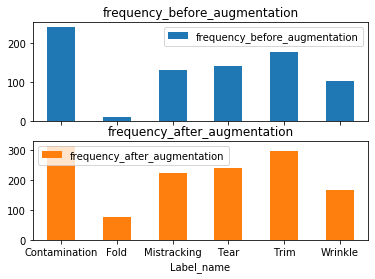

In [68]:
# %matplotlib inline
# axes = freq_dist.plot.bar(rot=0, subplots=True)
# fig2 = axes[1].legend(loc=2).get_figure()
# fig2.savefig('freq_dist_2.png')
# fig2.show()

In [ ]:
###--end of code